In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
learning_rate = 0.1
training_epoch = 2000

In [2]:
np.random.seed(23)
x1_label1 = np.random.normal(3, 1, 1000)
x2_label1 = np.random.normal(2, 1, 1000)
x1_label2 = np.random.normal(7, 1, 1000)
x2_label2 = np.random.normal(6, 1, 1000)
x1s = np.append(x1_label1, x1_label2)
x2s = np.append(x2_label1, x2_label2)
ys = np.asarray([0.] * len(x1_label1) + [1.] * len(x2_label1))

In [3]:
X1 = tf.placeholder(tf.float32, name = "x1")
X2 = tf.placeholder(tf.float32, name = "x2")
Y = tf.placeholder(tf.float32, name = "y")
w = tf.Variable([0., 0., 0.], name = "w")

y_model = tf.sigmoid(w[2] * X2 + w[1] * X1 + w[0])
cost = tf.reduce_mean(-Y * tf.log(y_model) - (1 -Y) * tf.log(1- y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epoch):
        err, _ = sess.run([cost, train_op], {X1: x1s, X2: x2s, Y: ys})
        if epoch % 100 == 0:
            print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err

    w_val = sess.run(w)

0 0.693146
100 0.370323
200 0.269034
300 0.211555
400 0.175194
500 0.150291
600 0.132204
700 0.118472


In [7]:
x1_boundary, x2_boundary = [], []
with tf.Session() as sess:
    for x1_test in np.linspace(0, 10, 30):
        for x2_test in np.linspace(0, 10, 30):
            z = sess.run(tf.sigmoid(x2_test*w_val[2] + x1_test*w_val[1] + w_val[0]))
            if abs(z - 0.5) < 0.05:
                x1_boundary.append(x1_test)
                x2_boundary.append(x2_test)

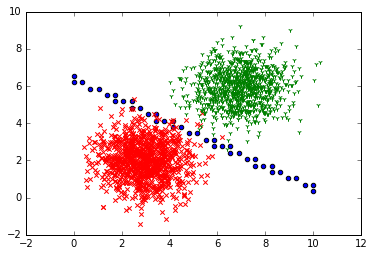

In [8]:
plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20)
plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)
plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)

plt.show()